In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [114]:
df=pd.read_csv("height-weight.csv")

In [115]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


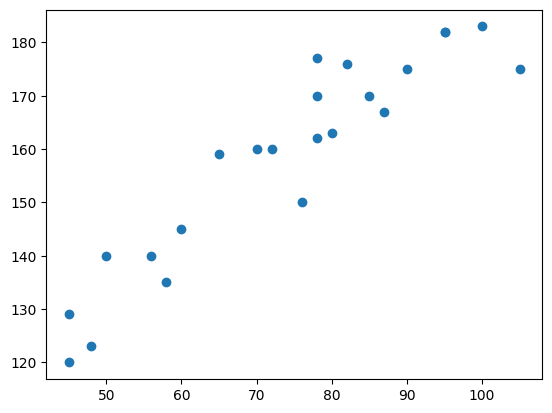

In [116]:
#scatter 
plt.scatter(df['Weight'],df['Height'])

In [117]:
## Correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


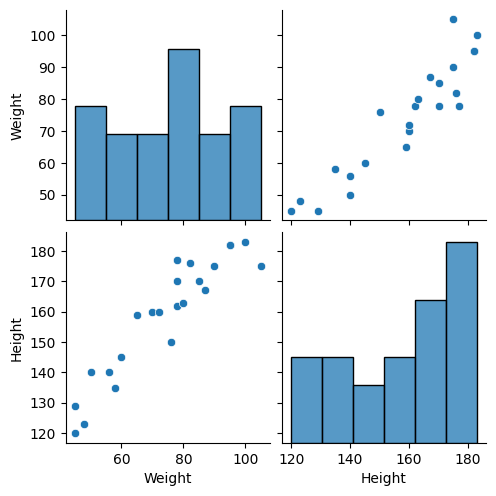

In [118]:
## seabirn for visualization 
import seaborn as sns 
sns.pairplot(df)

In [119]:
## Independent and dependent features 
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array



In [120]:
np.array(X).shape

(23, 1)

In [121]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [122]:
##train test 
from sklearn.model_selection import train_test_split


In [123]:
np.array(y).shape

(23,)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [125]:
X_train.shape

(17, 1)

In [126]:
#standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
##for data leaking 

In [127]:
X_test=scaler.transform(X_test)

In [128]:
X_test


array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
regression=LinearRegression(n_jobs=-1)

In [131]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [132]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


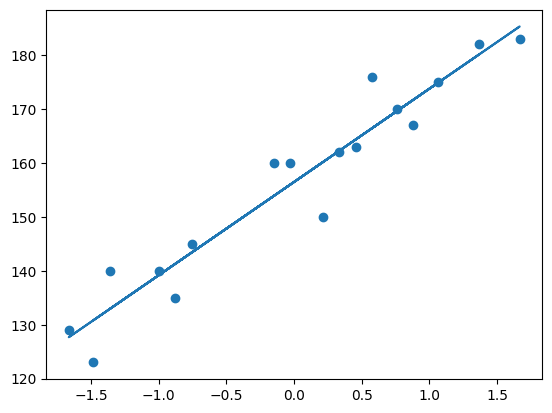

In [133]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [134]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [136]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [137]:
from sklearn.metrics import r2_score

In [138]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [139]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [145]:
## OLS Linear Regression
import statsmodels.api as sm

In [146]:
model=sm.OLS(y_train,X_train).fit()

In [147]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [148]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 10 Jan 2026   Prob (F-statistic):                       0.664
Time:                        23:57:07   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [150]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

c:\Users\ASUS-1\Desktop\Ai\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])